In [14]:
# type: ignore
import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import tensorflow_datasets as tfds
import tensorflow as tf

# import tensorflow_text
from keras_nlp.models import BertClassifier, BertPreprocessor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
columns = ["target", "id", "date", "flag", "user", "text"]
df = pd.read_csv("./input/sentiment140.csv", encoding="ISO-8859-1", names=columns)

In [5]:
df.drop(["id", "date", "flag", "user"], axis="columns", inplace=True)
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
X = df["text"]
y = df["target"].replace(4, 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [3]:
bert = BertClassifier.from_preset("bert_tiny_en_uncased_sst2")

100%|██████████| 145/145 [00:00<00:00, 674kB/s]


100%|██████████| 2.04k/2.04k [00:00<00:00, 7.31MB/s]
I0000 00:00:1721951279.079129  153404 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721951279.123283  153404 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721951279.123513  153404 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721951279.125907  153404 cuda_exec

100%|██████████| 50.3M/50.3M [00:01<00:00, 46.2MB/s]
/home/jared/micromamba/envs/delfin/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 84 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


100%|██████████| 16.8M/16.8M [00:00<00:00, 33.9MB/s]


100%|██████████| 226k/226k [00:00<00:00, 2.59MB/s]


In [5]:
bert.predict(["I love watch movies"])

I0000 00:00:1721951437.536039  159852 service.cc:146] XLA service 0x78351c004670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721951437.536072  159852 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Laptop GPU, Compute Capability 8.6
2024-07-25 17:50:37.563983: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-25 17:50:37.623758: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1721951440.692691  159852 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[-1.7796426,  2.082964 ]], dtype=float32)

In [6]:
bert.predict(["I hate watch movies"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


array([[-0.03013248,  0.23244327]], dtype=float32)

In [10]:
bert.evaluate(df["text"], df["target"])

49491/49491 ━━━━━━━━━━━━━━━━━━━━ 330s 7ms/step - loss: nan - sparse_categorical_accuracy: 0.6663


[nan, 0.3933696746826172]

In [6]:
preset = "bert_tiny_en_uncased"


preprocessor = BertPreprocessor.from_preset(
    preset,
    sequence_length=40,
)


bert = BertClassifier.from_preset(preset, preprocessor=preprocessor, num_classes=2)

I0000 00:00:1721957255.588534  207297 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721957255.611348  207297 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721957255.611569  207297 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1721957255.613003  207297 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [9]:
bert.summary()

Preprocessor: "bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 128), (None,      │       4,385,920 │ padding_mask[0][0],        │
│                               │ None, 128)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 128)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             258 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 13,158,536 (50.20 MB)

 Trainable params: 4,386,178 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772,358 (33.46 MB)

In [8]:
# Compile
bert.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(
        from_logits=True
    ),  #'binary_crossentropy',
    optimizer=keras.optimizers.Adam(1e-5),
    metrics=["accuracy"],
)

# Fit
history = bert.fit(
    x=X_train, y=y_train, batch_size=32, epochs=8, validation_data=(X_test, y_test)
)

Epoch 1/8
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 175s 4ms/step - accuracy: 0.8202 - loss: 0.3941 - val_accuracy: 0.8250 - val_loss: 0.3869
Epoch 2/8
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 161s 4ms/step - accuracy: 0.8237 - loss: 0.3878 - val_accuracy: 0.8268 - val_loss: 0.3836
Epoch 3/8
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 161s 4ms/step - accuracy: 0.8277 - loss: 0.3811 - val_accuracy: 0.8287 - val_loss: 0.3807
Epoch 4/8
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 161s 4ms/step - accuracy: 0.8307 - loss: 0.3758 - val_accuracy: 0.8298 - val_loss: 0.3786
Epoch 5/8
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 161s 4ms/step - accuracy: 0.8331 - loss: 0.3708 - val_accuracy: 0.8309 - val_loss: 0.3771
Epoch 6/8
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 160s 4ms/step - accuracy: 0.8359 - loss: 0.3666 - val_accuracy: 0.8321 - val_loss: 0.3763
Epoch 7/8
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 160s 4ms/step - accuracy: 0.8380 - loss: 0.3621 - val_accuracy: 0.8326 - val_loss: 0.3749
Epoch 8/8
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 158s 4ms/step - accuracy: 

In [2]:
bert = tf.keras.models.load_model("saved_model/bert_tiny.keras")

I0000 00:00:1722031200.672726  260911 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722031200.777614  260911 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722031200.777826  260911 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722031200.779754  260911 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [3]:
bert.summary()

Preprocessor: "bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 128), (None,      │       4,385,920 │ padding_mask[0][0],        │
│                               │ None, 128)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 128)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │             258 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,386,178 (16.73 MB)

 Trainable params: 4,386,178 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
y_pred = bert.predict(X_test)

9899/9899 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


In [25]:
y_pred = [pred.argmax() for pred in y_pred]

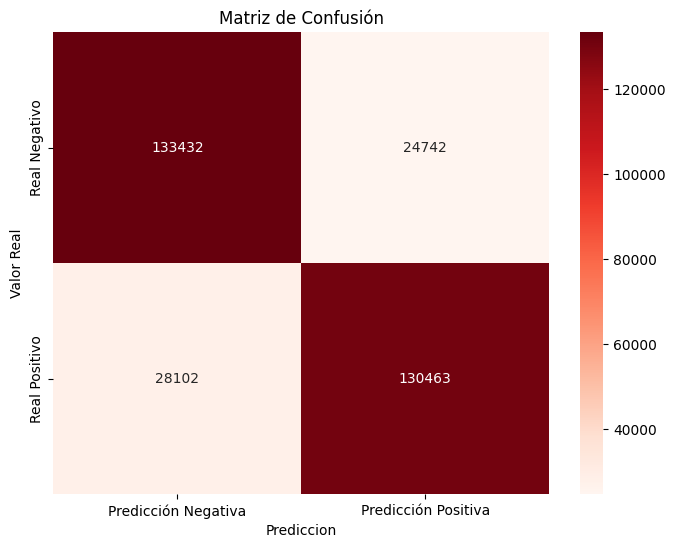

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["Predicción Negativa", "Predicción Positiva"],
    yticklabels=["Real Negativo", "Real Positivo"],
)
plt.xlabel("Prediccion")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

In [28]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8331623197648537


In [27]:
print(classification_report(y_test, y_pred))
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"recall (specificity): {specificity}")

              precision    recall  f1-score   support

           0       0.83      0.84      0.83    158174
           1       0.84      0.82      0.83    158565

    accuracy                           0.83    316739
   macro avg       0.83      0.83      0.83    316739
weighted avg       0.83      0.83      0.83    316739

recall (specificity): 0.8435773262356645


In [15]:
def predict(text: str):
    class_name = ["Negativo", "Positivo"]
    return class_name[bert.predict([text]).argmax()]

In [16]:
predict("I love watch movies")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


'Positivo'

In [17]:
predict("I am tired and I do not want to do homework")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


'Negativo'

In [18]:
predict("I have many friends")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


'Positivo'

In [19]:
predict("I do not have friends")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


'Negativo'

In [20]:
bert.save("saved_model/bert_tiny.keras")